In [12]:
mode = "png"

import matplotlib

font = {'family' : 'Dejavu Sans',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

import matplotlib
from matplotlib import pyplot as plt

In [13]:
from graspologic.simulations import sbm
from graspologic.embed import AdjacencySpectralEmbed as ASE
import numpy as np

ns = [50, 40, 30]
B = [[0.6, 0.2, 0.2],
     [0.2, 0.6, 0.2],
     [0.2, 0.2, 0.6]]

np.random.seed(1234)
A = sbm(n=ns, p = B)

# the true community labels
z = [0 for i in range(0,ns[0])] + [1 for i in range(0, ns[1])] + [2 for i in range(0, ns[2])]
Xhat = ASE(n_components=3).fit(A).latent_left_

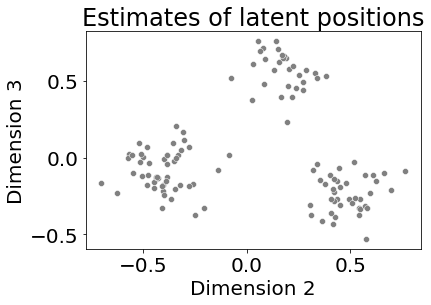

In [14]:
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

data = DataFrame({"Dimension 2" : Xhat[:,1], "Dimension 3" : Xhat[:,2]})
palette = {"0" : "blue", "1": "green", "2": "red"}
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.scatterplot(data=data, x="Dimension 2", y="Dimension 3", color="gray", ax=ax)
ax.set_title("Estimates of latent positions");

In [15]:
centers = np.array([[.5, .5], [-0.05, 0.05], [-0.05, -0.05]])
datcenters = DataFrame({"Dimension 2": centers[:,0], "Dimension 3": centers[:,1], "Cluster": ["0", "1","2"]})

In [16]:
from scipy.spatial import distance_matrix
distances = distance_matrix(Xhat[:,1:3], centers)
assignment = np.argmin(distances, axis=1)

data["Closest Center"] = assignment.astype(str)

In [17]:
centers = np.array([np.mean(Xhat[assignment == k,1:3], axis=0) for k in range(0, 3)])

datcenters = DataFrame({"Dimension 2": centers[:,0], "Dimension 3": centers[:,1], "Cluster": ["0", "1","2"]})

In [18]:
distances = distance_matrix(Xhat[:,1:3], centers)
assignment = np.argmin(distances, axis=1)
centers_new = np.array([np.mean(Xhat[assignment == k,1:3], axis=0) for k in range(0, 3)])

data["Closest Center"] = assignment.astype(str)

/tmp/ipykernel_57/2181549552.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x="Dimension 2", y="Dimension 3", ax=ax, **color_kwarg[i],


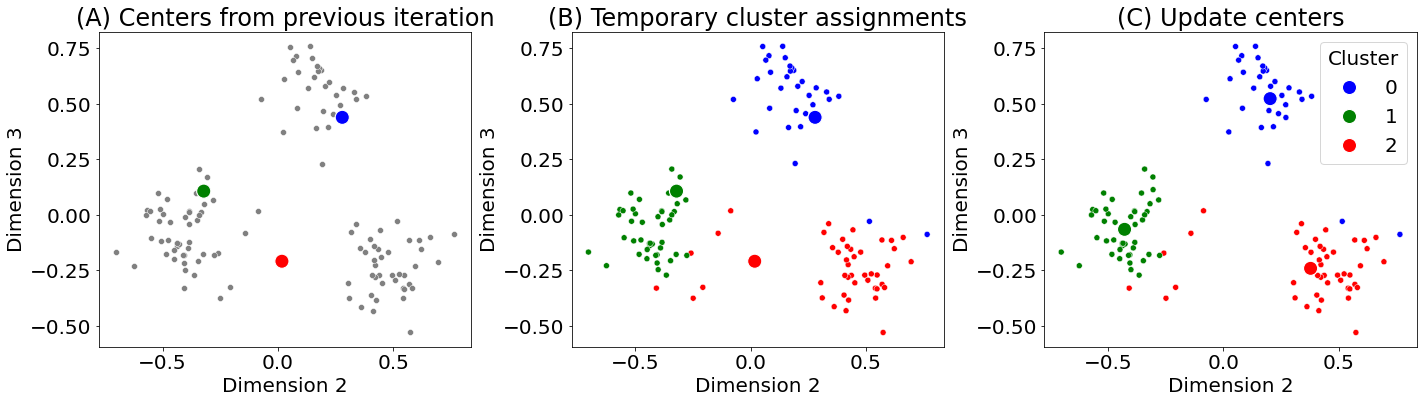

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
color_kwarg = [{"color": "gray"}, {"hue": "Closest Center"}, {"hue": "Closest Center"}]
cdat = [centers, centers, centers_new]
titles = ["(A) Centers from previous iteration", "(B) Temporary cluster assignments", "(C) Update centers"]

for i, ax in enumerate(axs.flat):
    sns.scatterplot(data=data, x="Dimension 2", y="Dimension 3", ax=ax, **color_kwarg[i],
                    palette=palette, legend=False)
    datcenters = DataFrame({"Dimension 2": cdat[i][:,0], "Dimension 3": cdat[i][:,1], "Cluster": ["0", "1","2"]})
    sns.scatterplot(data=datcenters, x="Dimension 2", y="Dimension 3", hue="Cluster",
                    palette=palette, ax=ax, s=200)
    ax.set_title(titles[i])
    if i != 2:
        ax.get_legend().remove()

fig.tight_layout()
fname = "kmeans_process"
if mode == "png":
    fig.savefig("Figures/{}.{}".format(fname, mode))
    fig.savefig("Figures/{}.svg".format(fname))
else:
    fig.savefig("Figures/{}.svg".format(fname))

In [20]:
from sklearn.cluster import KMeans

labels_kmeans = KMeans(n_clusters = 3, random_state=1234).fit_predict(Xhat)

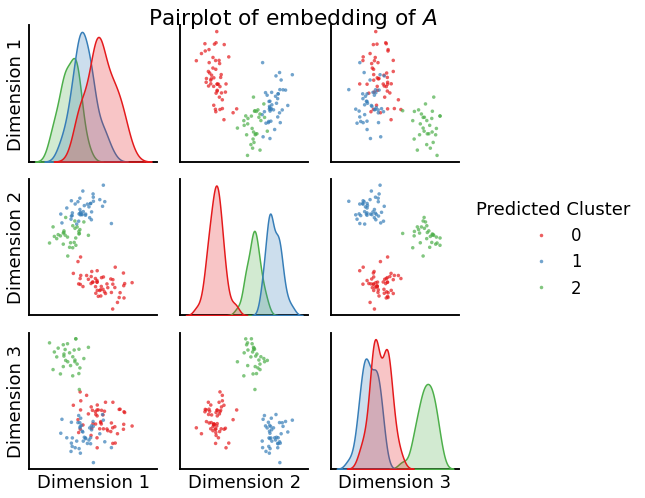

In [21]:
from graspologic.plot import pairplot

fig = pairplot(Xhat, labels=labels_kmeans, title="Pairplot of embedding of $A$", legend_name="Predicted Cluster")

fname = "kmeans_out"
if mode == "png":
    fig.savefig("Figures/{}.{}".format(fname, mode))
    fig.savefig("Figures/{}.svg".format(fname))
else:
    fig.savefig("Figures/{}.svg".format(fname))

In [35]:
from sklearn.metrics import confusion_matrix
# compute the confusion matrix between the true labels z
# and the predicted labels labels_kmeans
cf_matrix = confusion_matrix(z, labels_kmeans)

In [36]:
cfm_norm = cf_matrix/cf_matrix.sum(axis=1)[:,None]

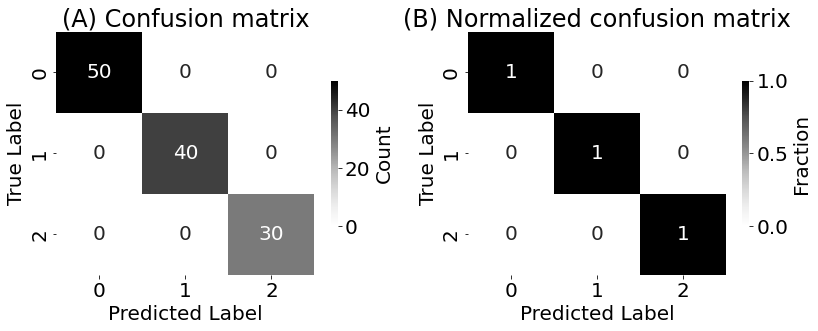

In [51]:
from graphbook_code import cmaps

fig, axs = plt.subplots(1,2, figsize=(12,5))

sns.heatmap(cf_matrix, cmap=cmaps["sequential"], ax=axs[0], annot=True, cbar_kws={"label": "Count", "shrink": 0.6})
axs[0].set_title("(A) Confusion matrix")
axs[0].set_ylabel("True Label")
axs[0].set_xlabel("Predicted Label")

sns.heatmap(cfm_norm, cmap=cmaps["sequential"], ax=axs[1], annot=True, cbar_kws={"label": "Fraction", "shrink": 0.6})
axs[1].set_title("(B) Normalized confusion matrix")
axs[1].set_ylabel("True Label")
axs[1].set_xlabel("Predicted Label")

fig.tight_layout()

fname = "kmeans_cfmtx"
if mode == "png":
    fig.savefig("Figures/{}.{}".format(fname, mode))
    fig.savefig("Figures/{}.svg".format(fname))
else:
    fig.savefig("Figures/{}.svg".format(fname))

In [52]:
from sklearn.metrics import adjusted_rand_score

ari_kmeans = adjusted_rand_score(z, labels_kmeans)

In [53]:
print("ARI(predicted communities, true communities) = {}".format(ari_kmeans))

ARI(predicted communities, true communities) = 1.0
